In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

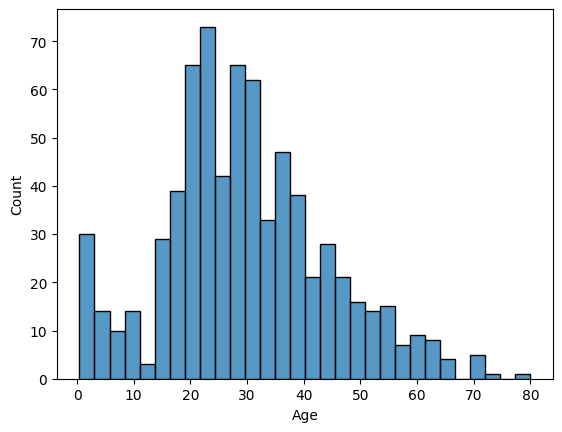

In [6]:
sns.histplot(x="Age",data=data,bins=30)

In [7]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [8]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [9]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)

<Axes: >

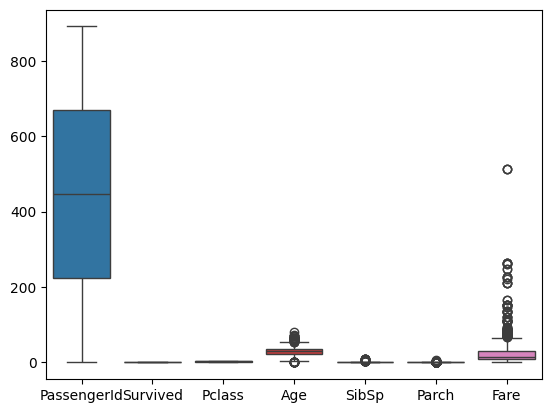

In [12]:
sns.boxplot(data)

In [13]:
q1=np.percentile(data["Age"],25)
q3=np.percentile(data["Age"],75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data.loc[data["Age"]>upper_bound,"Age"]=upper_bound
data.loc[data["Age"]<lower_bound,"Age"]=lower_bound

In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data=data.drop(["PassengerId","Name","Ticket"],axis=1)

In [16]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data["Cabin"]=le.fit_transform(data["Cabin"])
data["Embarked"]=le.fit_transform(data["Embarked"])

In [18]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

In [19]:
data["Embarked"]=data["Embarked"].astype('int64')

In [20]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
selector=SelectKBest(chi2,k=5)
X_new=selector.fit_transform(X,y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_tst,y_train,y_test=train_test_split(X_new,y,test_size=.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg=LogisticRegression()

In [26]:
lg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred=lg.predict(X_tst)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8212290502793296


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_tst)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Feature Selection: {accuracy}")

Accuracy with Feature Selection: 0.7932960893854749
